In [3]:
from pathlib import Path


In [4]:
path_images = Path("C:/Users/joash/Desktop/258_Assigment3/images/segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/collages")
path_masks = Path("C:/Users/joash/Desktop/258_Assigment3/images/segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/masks")


In [6]:
from fastai.vision.all import *


In [7]:
block = DataBlock(
    blocks=(ImageBlock, MaskBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=lambda o: path_masks/(o.stem + '.png'),  # Adjust the extension if necessary
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [8]:
dls = block.dataloaders(path_images, bs=4)


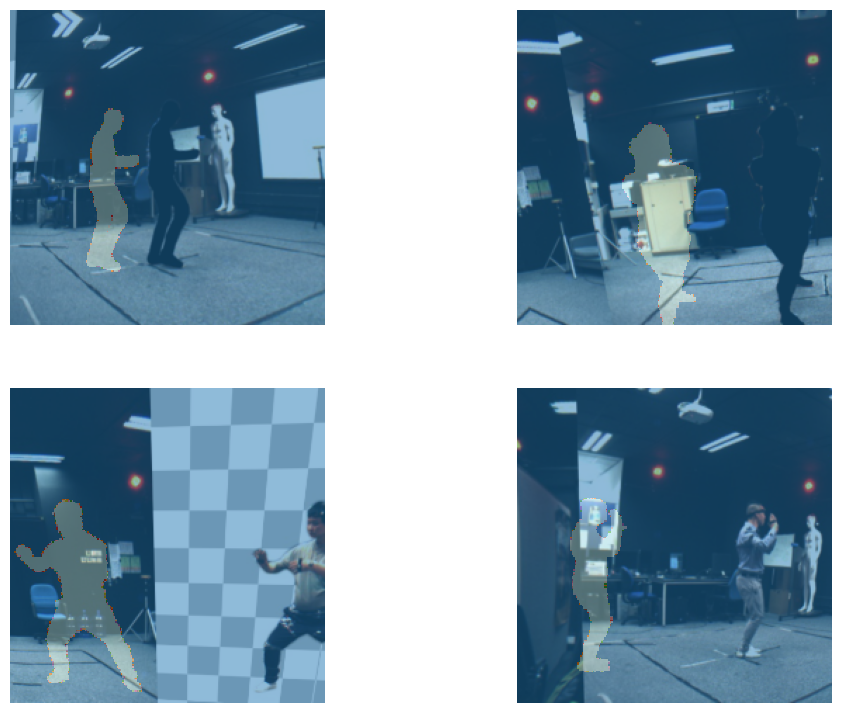

In [9]:
dls.show_batch(max_n=6, vmin=1, vmax=30, figsize=(12, 9))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of images: torch.Size([4, 3, 224, 224])
Shape of masks: torch.Size([4, 224, 224])


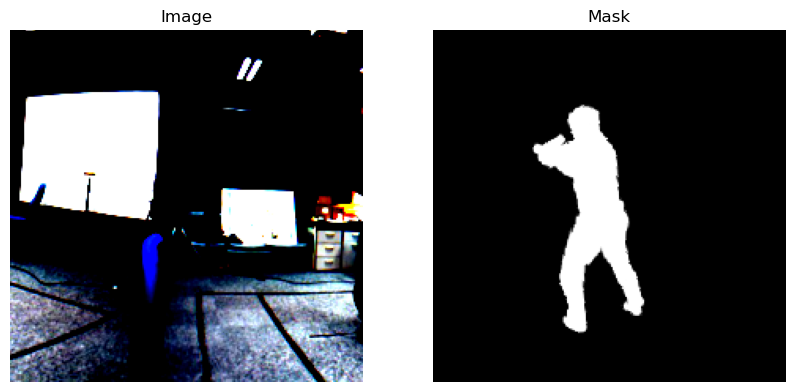

In [13]:
# Load a batch of data
x, y = dls.one_batch()

# Print the shape of images and masks
print(f'Shape of images: {x.shape}')
print(f'Shape of masks: {y.shape}')

# Optionally, visualize the first image and mask to confirm they align visually
import matplotlib.pyplot as plt

def show_image_and_mask(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.permute(1, 2, 0))
    axs[0].set_title('Image')
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')
    for ax in axs: ax.axis('off')
    plt.show()

# Convert the tensor to a NumPy array and display
# Note: This assumes your masks are single-channel; adjust indexing as necessary
show_image_and_mask(x[0], y[0].squeeze())


In [11]:
import numpy as np
from PIL import Image
import os

path_masks = Path("C:/Users/joash/Desktop/258_Assigment3/images/segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/masks")
unique_vals = set()
for mask_file in os.listdir(path_masks):
    mask_path = path_masks/mask_file
    mask = np.array(Image.open(mask_path))
    unique_vals.update(np.unique(mask))

n_out = len(unique_vals)  # This is your number of distinct segmentation classes
print(f"Number of unique classes in masks: {n_out}")


Number of unique classes in masks: 256


In [12]:
learn = unet_learner(dls, resnet34, metrics=accuracy, n_out=256)  # Using 256 unique classes
learn.fine_tune(12)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\joash/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 31.2MB/s]


epoch,train_loss,valid_loss,accuracy,time


AssertionError: Exception occured in `Recorder` when calling event `after_batch`:
	==:
229376
200704

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))
